# Week 8 - Visualizing Data

matplotlib과 seaborn을 이용하여 데이터를 시각화해보자.

## Weather Data Visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
# Load Data
data = pd.read_csv("data/weather-mod.csv")

In [4]:
data.index = data.date
data = data.drop(["date"], axis=1)

In [5]:
data.columns

Index(['max_temp', 'mean_temp', 'min_temp', 'max_dew', 'mean_dew', 'min_dew',
       'max_humidity', 'mean_humidity', 'min_humidity', 'max_pressure',
       'mean_pressure', 'min_pressure', 'max_visibilty', 'mean_visibility',
       'min_visibility', 'max_wind', 'mean_wind', 'min_wind', 'precipitation',
       'cloud_cover', 'events', 'wind_dir', 'rain', 'thunderstorm', 'fog',
       'snow', 'max_tempc', 'min_tempc', 'mean_tempc'],
      dtype='object')

In [6]:
data.head()

,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,max_pressure,...,cloud_cover,events,wind_dir,rain,thunderstorm,fog,snow,max_tempc,min_tempc,mean_tempc
date,,,,,,,,,,,,,,,,,,,,,
2012-03-10,56,40,24,24,20,16,74,50,26,30.53,...,0,NaN,138,False,False,False,False,13.333333,-4.444444,4.444444
2012-03-11,67,49,30,43,31,24,78,53,28,30.37,...,1,Rain,163,True,False,False,False,19.444444,-1.111111,9.444444
2012-03-12,71,62,53,59,55,43,90,76,61,30.13,...,6,Rain,190,True,False,False,False,21.666667,11.666667,16.666667
2012-03-13,76,63,50,57,53,47,93,66,38,30.12,...,0,NaN,242,False,False,False,False,24.444444,10.000000,17.222222
2012-03-14,80,62,44,58,52,43,93,68,42,30.15,...,0,NaN,202,False,False,False,False,26.666667,6.666667,16.666667


### mean_temp와 mean_humidity로 scatterplot 을 그려보자

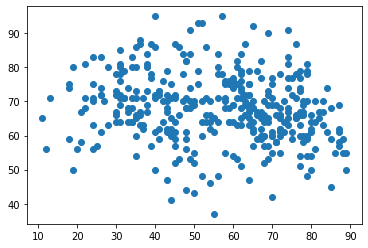

In [7]:
plt.plot('mean_temp', 'mean_humidity', data=data, linestyle='none', marker='o')
plt.show()

### cloud_cover와 mean_temp는 상관관계가 있을까?

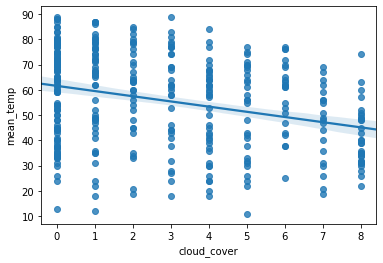

In [8]:
sb.regplot(x=data["cloud_cover"], y=data["mean_temp"])

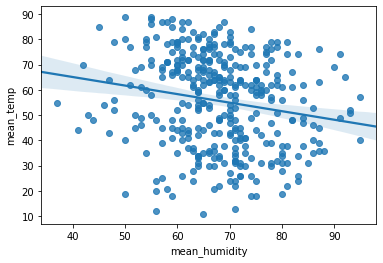

In [9]:
sb.regplot(x=data["mean_humidity"], y=data["mean_temp"])
# regression line은 상관관계가 있어보이지만, 데이터가 퍼져 있어 상관관계가 없다고 해석

### 모든 변인들의 상관관계 그래프를 그려보자

In [10]:
sub_data = data[['mean_temp', 'mean_dew', 'mean_humidity', 'min_humidity', 
       'mean_pressure', 'mean_visibility', 'mean_wind', 'precipitation',
       'cloud_cover']]
sub_data.head()

,mean_temp,mean_dew,mean_humidity,min_humidity,mean_pressure,mean_visibility,mean_wind,precipitation,cloud_cover
date,,,,,,,,,
2012-03-10,40,20,50,26,30.45,10,6,0.00,0
2012-03-11,49,31,53,28,30.27,10,7,T,1
2012-03-12,62,55,76,61,29.99,10,14,0.03,6
2012-03-13,63,53,66,38,30.06,10,5,0.00,0
2012-03-14,62,52,68,42,30.10,10,6,0.00,0


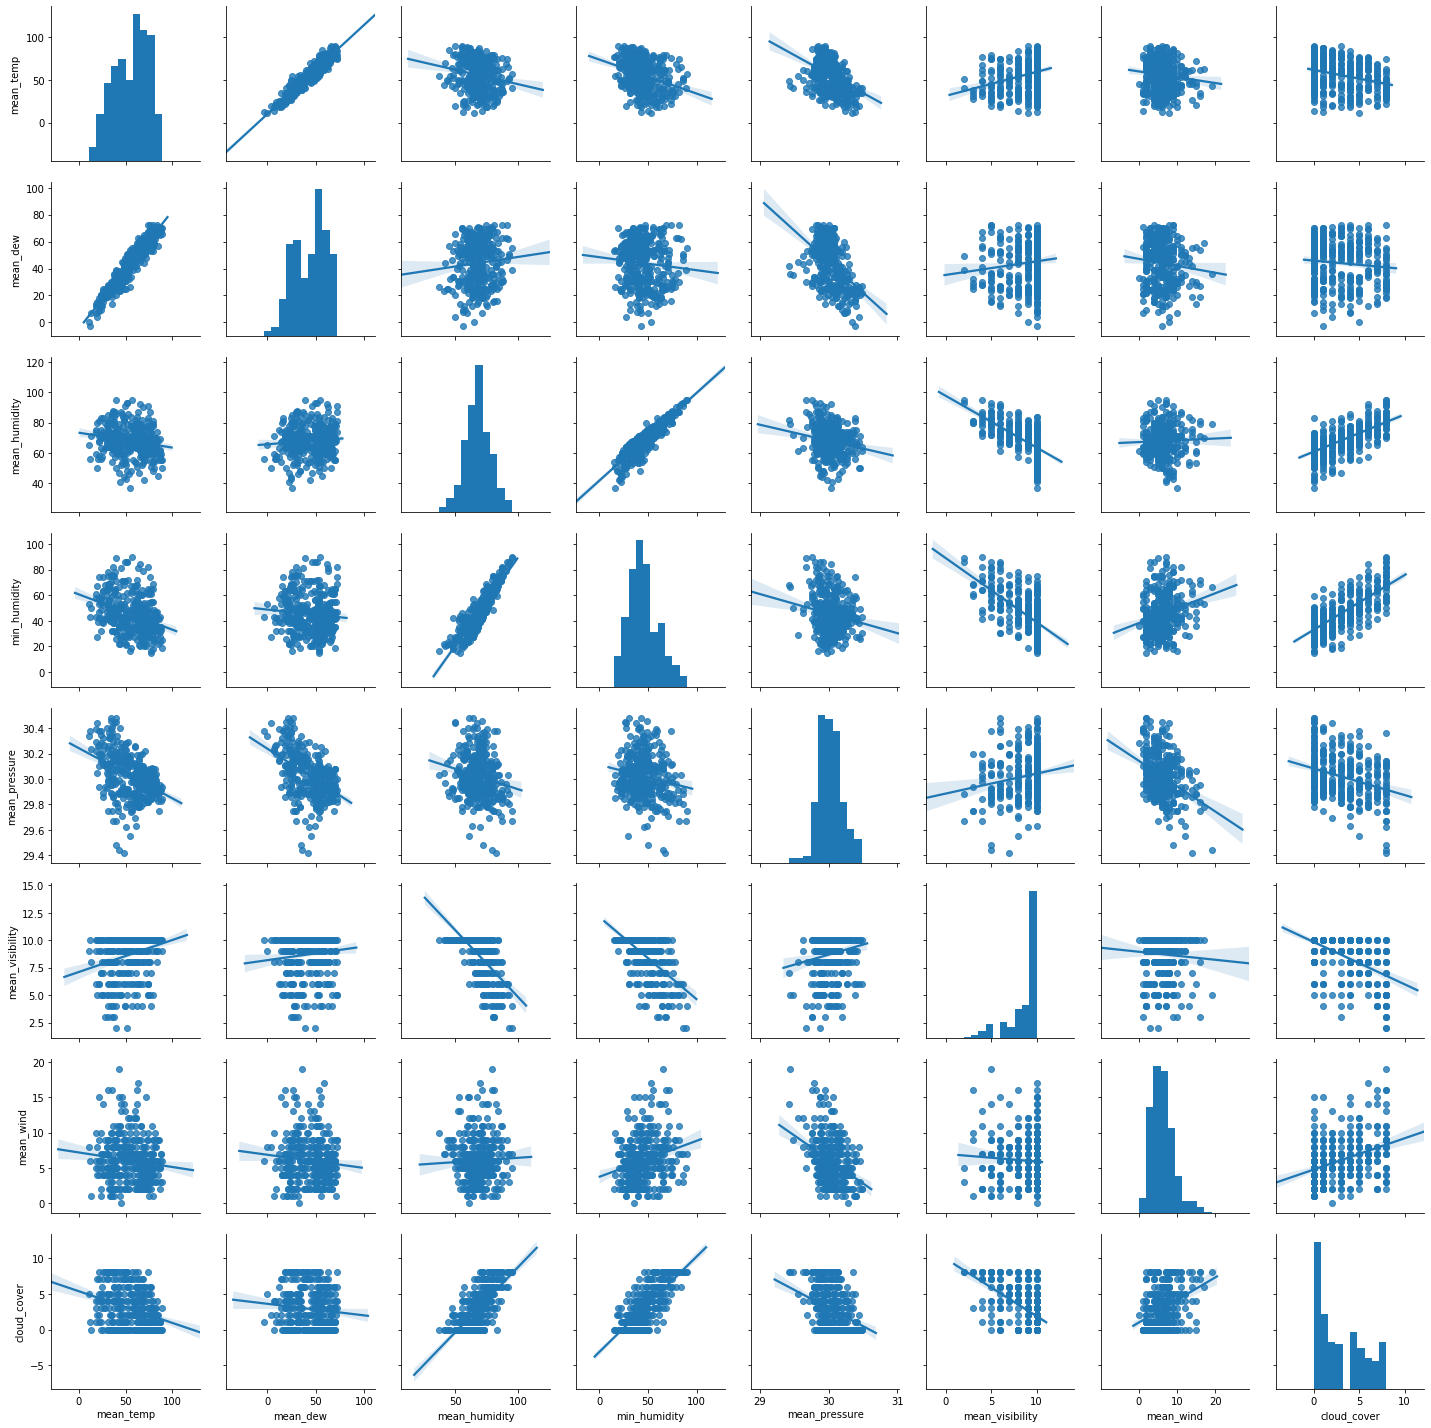

In [11]:
sb.pairplot(sub_data, kind="reg") # regression
plt.show()

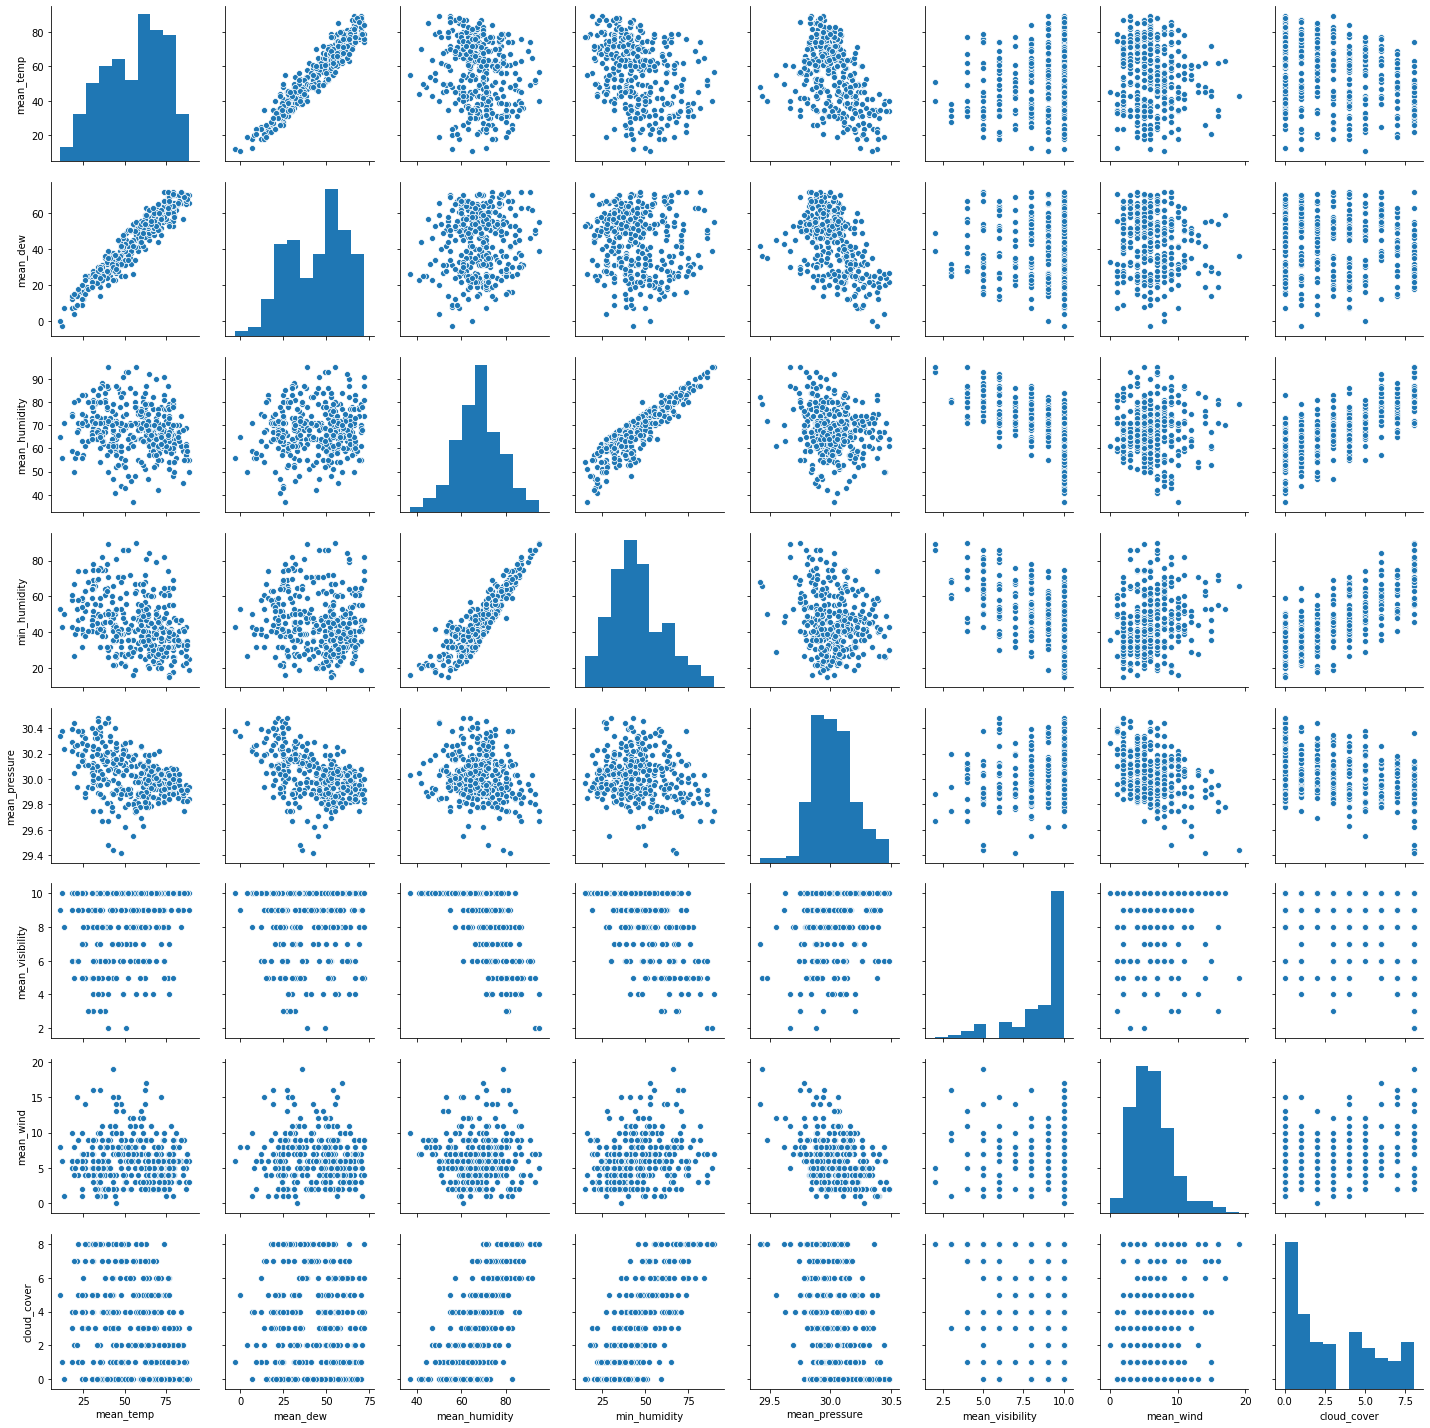

In [12]:
sb.pairplot(sub_data, kind="scatter")
plt.show()

## Gapminder Data Visualization

In [13]:
def read_gapminder_data(filename, colname):
    data = pd.read_csv("data/gapminder/{}".format(filename), header=None)
    data.columns = ["country", colname]
    data.index = data.country
    data = data.drop(['country'], axis=1)
    return data

In [14]:
employment = read_gapminder_data("employment.csv", "employment")
life_exp = read_gapminder_data("life_expectancy.csv", "life_exp")
gdp = read_gapminder_data("gdp_per_capita.csv", "gdp")

In [15]:
frames = [employment, life_exp, gdp]
gm_data = pd.concat(frames, axis=1)

In [16]:
gm_data.head()

,employment,life_exp,gdp
country,,,
Albania,51.400002,74.7,1681.613910
Algeria,50.500000,75.0,2155.485231
Angola,75.699997,57.6,562.987685
Argentina,58.400002,75.4,9388.688523
Armenia,40.099998,72.3,1424.190562


### 변인들 간의 상관관계를 그려보자

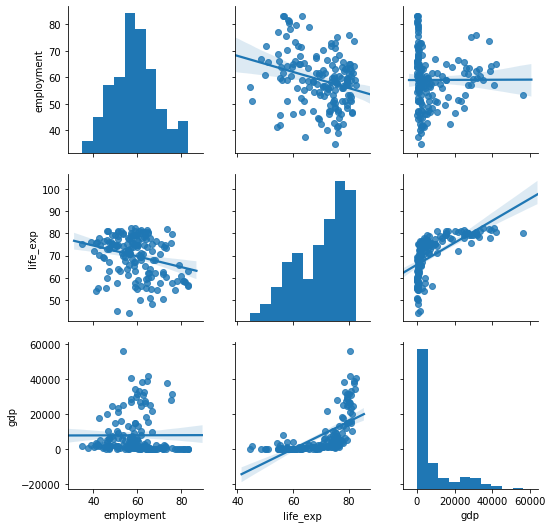

In [17]:
sb.pairplot(gm_data, kind="reg")
plt.show()
# gdp와 life exp가 상관관계가 있는 것처럼 보임
# employment와 life exp는 부적 관계에 있는 것처럼 보이나... 데이터가 흩어져있기 때문에 분석은 무리

### Bubble Graph
Bubble Graph는 세개의 변인을 이용한다.

x, y 이외에 z는 점의 크기로 표현된다..

In [18]:
gm_subset = gm_data.sample(n=50) # 임의대로 50개 샘플링
x = gm_subset.index # index는 country였음
y = gm_subset.life_exp
z = gm_subset.gdp

Text(0.5, 1.0, 'Gapminder - Life Expectancy and GDP')

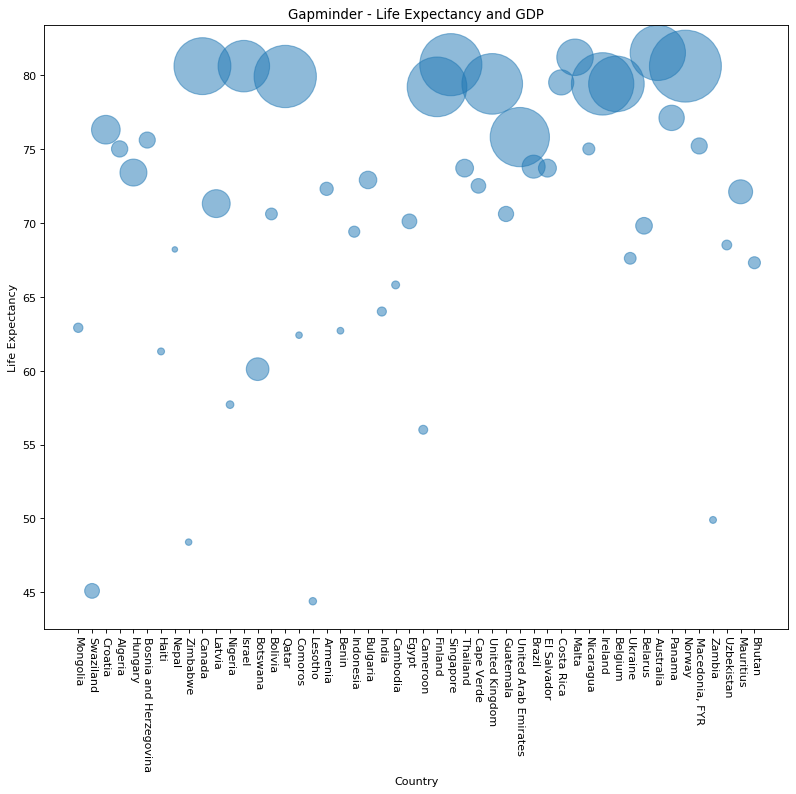

In [21]:
from matplotlib.pyplot import figure

# 도화지에 대한 세팅
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
# num: number가 자동으로 랜덤으로 붙는 것(figure의 id)
# figsize: 가로세로 비율
# dpi: 해상도

# Change color with c and alpha. I map the color to the X axis value.
# alpha = 투명도
plt.scatter(x, y, s=z/10, alpha=0.5) # QQ. s=z/10? size는 z(gm_subset.gdp)로 설정했는데, gdp가 너무 커서 10으로 나눠줌

# 그래프에 대한 세팅
# Add titles (main and on axis)
plt.xticks(rotation=-90)
plt.xlabel("Country")
plt.ylabel("Life Expectancy")
plt.title("Gapminder - Life Expectancy and GDP")

# GDP가 높은 나라들의 life exp가 위에 있긴 한데, 이것만으로는 깔끔하지 않음

### gdp를 기준으로 sorting 한 후 그래프를 다시 그려보자.

In [23]:
gm_subset_sorted = gm_subset.sort_values(['gdp'], ascending=True)
gm_subset_sorted

,employment,life_exp,gdp
country,,,
Nepal,61.799999,68.2,244.537261
Zimbabwe,66.800003,48.4,339.654883
Comoros,68.000000,62.4,347.100033
Benin,71.599998,62.7,366.044966
Zambia,61.000000,49.9,385.122823
Haiti,55.900002,61.3,392.094230
Lesotho,56.299999,44.4,446.320416
Nigeria,50.900002,57.7,476.214166
Cambodia,78.900002,65.8,510.019766


In [24]:
x = gm_subset_sorted.index
y = gm_subset_sorted.life_exp
z = gm_subset_sorted.gdp

Text(0.5, 1.0, 'Gapminder - Life Expectancy and GDP')

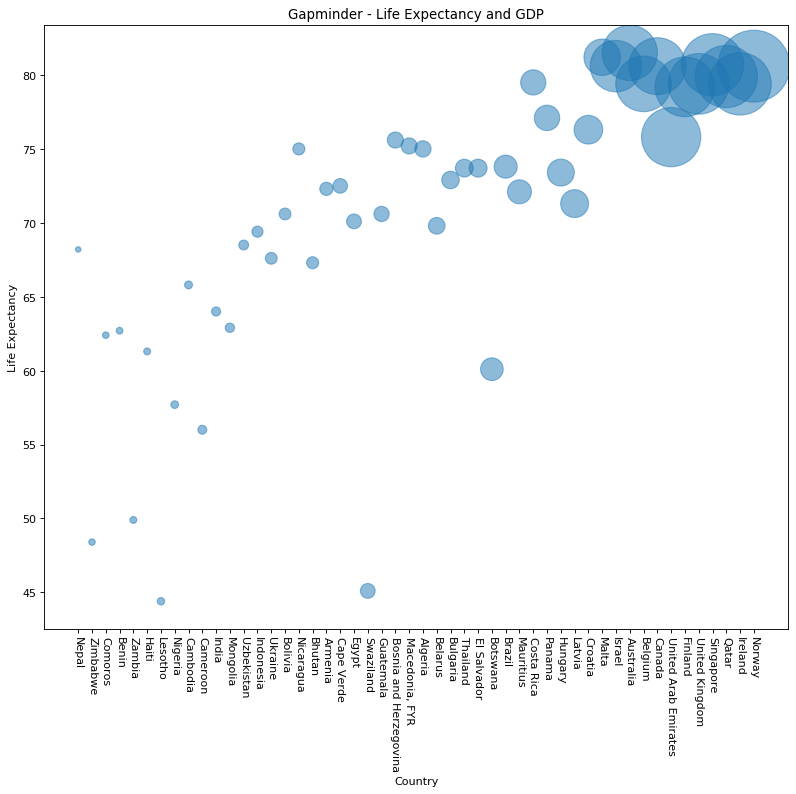

In [25]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z/10, alpha=0.5)
 
# Add titles (main and on axis)
plt.xticks(rotation=-90)
plt.xlabel("Country")
plt.ylabel("Life Expectancy")
plt.title("Gapminder - Life Expectancy and GDP")

### Seaborn 을 이용해서 위의 그래프를 다시 그려보자.

In [26]:
# 삭제했던 "country" 컬럼이 다시 필요.
gm_subset_sorted["country"] = gm_subset_sorted.index
gm_subset_sorted.head()

,employment,life_exp,gdp,country
country,,,,
Nepal,61.799999,68.2,244.537261,Nepal
Zimbabwe,66.800003,48.4,339.654883,Zimbabwe
Comoros,68.000000,62.4,347.100033,Comoros
Benin,71.599998,62.7,366.044966,Benin
Zambia,61.000000,49.9,385.122823,Zambia


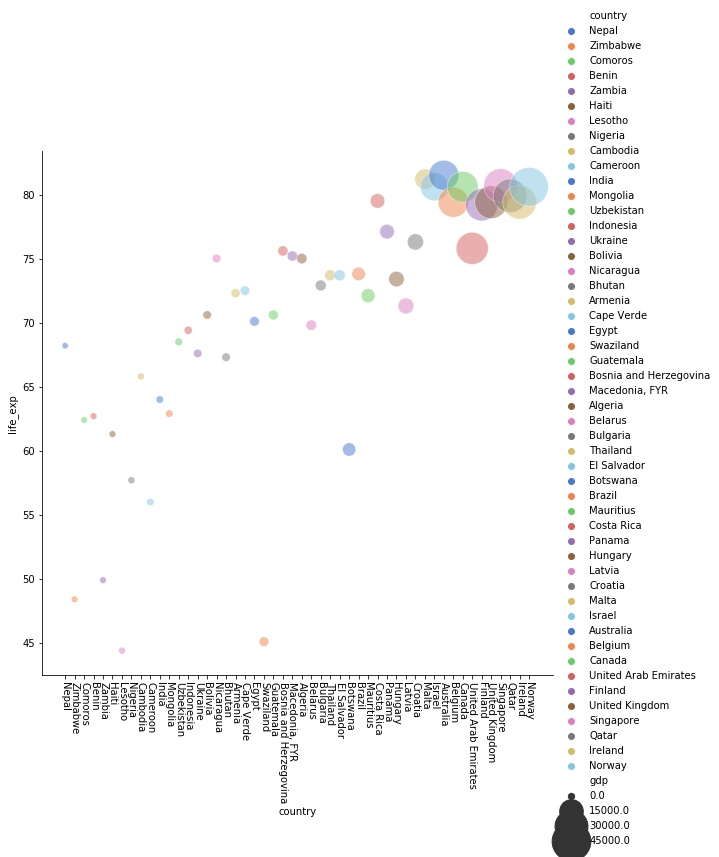

In [29]:
# Plot miles per gallon against horsepower with other semantics
bubble = sb.relplot(x="country", y="life_exp", hue="country", size="gdp", # hue: random하게 color를 assign
            sizes=(40, 1500), alpha=.5, palette="muted",
            # size를 range로 지정; 값의 범위가 너무 큰 경우 log를 씌우면 되는데, 그러면 편차를 알기가 어려움. seaborn에서는 값의 범위를 지정할 수 있음
            height=8, data=gm_subset_sorted)
bubble.set_xticklabels(rotation=-90)
